<a href="https://colab.research.google.com/github/migkatayama/MLproject-online-fraud/blob/master/ML_CLSF_Fraude_CompraOnline_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DETECÇÃO DE FRAUDES DE COMPRAS ONLINE

## Definição do Escopo do negócio

O escopo é a identificação de Fraudes nas Compras de E-commerce.
O dataset utilizado é um arquivo que contém as compras efetuadas de clientes.

## Versão 1
Essa versão é uma implementação mais simples, cujo objetivo é ter a visão mais básica de uma implementação e comparar seu resultado com as próximas versões onde serão aplicadas diversas técnicas de otimização.

## Fluxo implementado:

*   Carga do Dataset
*   Análise Exploratória dos Dados (EDA)
    * Label Encoder
*   Separação dos Dados de Treino e Teste (Spliting)
*   Treinamento (Fitting), criando 6 modelos de classificação:
    * Naive Bayes
    * Regressão Logistica
    * KNN
    * Árvore de Decisão
    * Random Forest
    * SVM
*   Validação/Acurácia e comparativos


# 1 . DATASET

In [113]:
# Importando arquivos
from pandas import read_csv
import warnings
warnings.filterwarnings('ignore')

arquivo = 'fraud_ecommerce.csv'
dfbase = read_csv(arquivo)

# Retorna a qtde de linha e colunas carregadas
dfbase.shape
 


(151114, 11)

# 2 . ANÁLISE EXPLORATÓRIA DOS DADOS (EDA - EXPLORATORY DATA ANALYSIS)

A Análise Exploratória dos Dados (EDA - Exploratory Data Analysis) é a etapa (para mim) a etapa mais importante e crucial da montagem de um modelo preditivo.

Pois ele é o início de tudo, que irá ditar quais as técnicas a serem utilizadas, quais transformações que devem ser efetuadas ou que podem melhorar o aprendizado do modelo.
Uma análise exploratória bem executada gerará um aprendizado mais apurado e consequentemente uma melhor acurácia.


Para essa versão básica, iremos usar uma análise exploratória mais simples para justamente nas versões mais avançadas aplicando as análises mais apuradas, compararmos os resultados.

In [26]:
# Visualizando os primeiros registros. Se não informar o parâmetro, o padrão é os 5 primeiros
dfbase.head(10)


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34.0,QVPSPJUOCKZAR,SEO,Chrome,M,39.0,7.327584e+08,0.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16.0,EOGFQPIZPYXFZ,Ads,Chrome,F,53.0,3.503114e+08,0.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15.0,YSSKYOSJHPPLJ,SEO,Opera,M,53.0,2.621474e+09,1.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44.0,ATGTXKYKUDUQN,SEO,Safari,M,41.0,3.840542e+09,0.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39.0,NAUITBZFJKHWW,Ads,Safari,M,45.0,4.155831e+08,0.0
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42.0,ALEYXFXINSXLZ,Ads,Chrome,M,18.0,2.809315e+09,0.0
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11.0,IWKVZHJOCLPUR,Ads,Chrome,F,19.0,3.987484e+09,0.0
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27.0,HPUCUYLMJBYFW,Ads,Opera,M,34.0,1.692459e+09,0.0
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30.0,ILXYDOZIHOOHT,SEO,IE,F,43.0,3.719094e+09,0.0
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62.0,NRFFPPHZYFUVC,Ads,IE,M,31.0,3.416747e+08,0.0


In [47]:
# Você pode também visualizar os últimos registros 
 dfbase.tail()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
151109,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35.0,LYSFABUCPCGBA,SEO,Safari,M,32.0,2.439047e+09,0.0
151110,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40.0,MEQHCSJUBRBFE,SEO,IE,F,26.0,2.748471e+09,0.0
151111,9999000,2015-01-01 07:02:20,NaN,NaN,ZINIADFCLHYPG,Direct,IE,M,NaN,4.103825e+09,NaN
151112,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46.0,CMCXFGRHYSTVJ,SEO,Chrome,M,37.0,3.601175e+09,0.0
151113,138208,2015-06-10 07:02:20,2015-07-21 02:03:53,20.0,ZINIADFCLHYPG,Direct,IE,M,38.0,4.103825e+09,0.0


In [19]:
# Visualizando as colunas e os tipos
dfbase.dtypes

# DICA: os atributos carregados como string(alfanumérico) estarão como object.
# Perceba então que os atributos de data de cadastro (signup_time) e de compra (purchase_time) estão como texto e não como data.

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

In [28]:
# Exibindo valores estatísticos básicos dos campos numéricos (os campso que não são números são automaticamente omitidos)
#=> DICA: Analise a medida "min" para verificar rapidamente se há atributos com negativos (há comandos para ver isso mas explico isso depois)

dfbase.describe()


,user_id,purchase_value,age,ip_address,class
count,1.511140e+05,151112.000000,151112.000000,1.511130e+05,151112.000000
mean,2.003007e+05,36.935372,33.140704,2.152158e+09,0.093646
std,1.207505e+05,18.322762,8.617733,1.248503e+09,0.291336
min,2.000000e+00,9.000000,18.000000,5.209350e+04,0.000000
25%,1.006435e+05,22.000000,27.000000,1.085939e+09,0.000000
50%,1.999625e+05,35.000000,33.000000,2.154785e+09,0.000000
75%,3.000615e+05,49.000000,39.000000,3.243264e+09,0.000000
max,9.999000e+06,154.000000,76.000000,4.294850e+09,1.000000


In [48]:
#=> DICA: Caso haja muitos atributos, parte deles podem não ser exibidos. Então utilize o campo de Transpor (trocar linhas e colunas)
dfbase.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,151114.0,2.003007e+05,1.207505e+05,2.000000,1.006435e+05,1.999625e+05,3.000615e+05,9.999000e+06
purchase_value,151112.0,3.693537e+01,1.832276e+01,9.000000,2.200000e+01,3.500000e+01,4.900000e+01,1.540000e+02
age,151112.0,3.314070e+01,8.617733e+00,18.000000,2.700000e+01,3.300000e+01,3.900000e+01,7.600000e+01
ip_address,151113.0,2.152158e+09,1.248503e+09,52093.496895,1.085939e+09,2.154785e+09,3.243264e+09,4.294850e+09
class,151112.0,9.364577e-02,2.913362e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


## VALORES FALTANTES (MISSING)

In [49]:
# Verificando se há atributos com dados faltantes (Missing ou NA). Aqueles que tiverem estão com valor maior que zero
dfbase.isna().sum()

user_id           0
signup_time       0
purchase_time     2
purchase_value    2
device_id         1
source            1
browser           0
sex               1
age               2
ip_address        1
class             2
dtype: int64

In [39]:
# Visualizando as linhas que tenham o atributo específico com valores faltantes (NA)
dfbase[dfbase['purchase_time'].isna()]

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
151077,9999000,2015-02-01 00:00:00,NaN,NaN,NaN,NaN,Firefox,NaN,NaN,NaN,NaN
151111,9999000,2015-01-01 07:02:20,NaN,NaN,ZINIADFCLHYPG,Direct,IE,M,NaN,4.103825e+09,NaN


Há vários tipos de tratamentos que podem ser efetuados para valores faltantes. Entre eles são:
* 1- Excluir a linha toda.
* 2- Manter a linha mas excluir a coluna toda de todas as linhas.
* 3- Substituir o valor faltante por um outro (como por zero, valor da média, etc).
* Há outros tratamentos mas listei apenas alguns. Os detalhes de todas opções vale um script específico para esse tema.

Para decidir qual utilizar, deve ser feito realmente uma análise detalhada.
- A primeira opção é a mais fácil mas por outro lado, pode perder informações que são necessárias.
- Similar a segunda opção, pois pode perder informações importantes das outras linhas que possuem dados.
- A terceira opção é uma forma mas dependendo pode impactar na análise final


Irei utilizar para esse caso a primeira opção, excluir todas as linhas.
Farei isso porque essas linhas não possuem alguns atributos  importantes preenchidos que serão usados como previsores, como a data da compra, valor da compra e nem o atributo class que será usado como target para treino e teste. Ou seja, a exclusão dessas linhas não impactará no resultado final.


In [114]:
# Excluindo (apenas) as linhas cuja coluna purchase_time esteja linha. 
dfbase = dfbase.dropna(subset=['purchase_time'])
dfbase.isna().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [53]:
# Listando a quantidade de linhas. Veja que diminiu a qtde.
print(dfbase.shape)

(151112, 11)


# 3 . TRANSFORMAÇÃO

Pode ocorrer que somente os atributos carregados não sejam suficientes ou na sua forma original não seja utilizável.

Nessas situações pode ser criado novos atributos a partir de transformações dos atuais.

No caso desse dataset, será criado um campo Tempo da diferença entre a data da compra e a data do cadastro do cliente.

In [115]:
import pandas as pd

# Convertendo os campos de datas que estavam como Object (ou seja, alfanumérico) para o tipo Datetime
dfbase['signup_time'] = pd.to_datetime(dfbase['signup_time'])
dfbase['purchase_time'] = pd.to_datetime(dfbase['purchase_time'])

dfbase.dtypes

user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value           float64
device_id                 object
source                    object
browser                   object
sex                       object
age                      float64
ip_address               float64
class                    float64
dtype: object

In [116]:
# Criando um novo atributo: tempo do cliente (em dias) entre a data da compra e do seu cadastro
dfbase['diff_time'] = ((dfbase['purchase_time'] - dfbase['signup_time']).astype('timedelta64[h]'))/24

dfbase['diff_time']

0         52.125000
1          0.166667
2          0.000000
3          5.666667
4         50.458333
            ...    
151108    60.875000
151109    10.750000
151110    77.333333
151112    59.541667
151113    40.791667
Name: diff_time, Length: 151112, dtype: float64

In [117]:
# Criando um novo atributo. Mês da compra

dfbase['purchase_month'] = dfbase['purchase_time'].dt.month
dfbase['purchase_month']

0         4
1         6
2         1
3         5
4         9
         ..
151108    3
151109    5
151110    5
151112    9
151113    7
Name: purchase_month, Length: 151112, dtype: int64

# 3 . FE - FEATURE ENGINEERNING / FEATURE SELECTION

A etapa de Seleção dos Atributos (Feature Selection) é uma das mais importantes para a construção de um modelo preditivo.

A simples escolha ou não de determinados atributos impacta diretamente no resultado.
Para isso, há várias técnicas a serem utilizadas.

Porém, nessa versão básica, será apenas escolhido manualmente os atributos.
Na próxima versão mais avançada, serão apresentados algumas das técnicas e efetuados as comparações os resultados.

Explicação da não escolha dos atributos:
* user_id
  * é um campo de identificação, único e totalmente específico. Não produz relevância para fazer predições de novos clientes. Ao contrário, seu uso pode gerar distorções no modelo gerado.
* device_id
  * idem acima.
* id_address
  * idem acima se usado o código inteiro. Porém, para um processo de análise mais avançado, poderia ser utilizado changes do IP para determinar regiões que são mais sucessíveis a fraudes.
* signup_time
  * ao invés de utilizar a data específica, vamos utilizar o campo diff_time que foi criado.
* purchase_time
  * para esse modelo específico, vamos utilizar o campo diff_time criado e o purchase_month, que é o mês da compra.


Sobre os atributos que foram selecionados, isso não significa que necessariamente todos são relevantes para a montagem do modelo.
Isso será identificados nas técnicas de Feature Selection, onde será feitos algumas simulações para verificar quais conjuntos de atributos trazem melhor resultados.


In [0]:
# Montando o dataframe apenas com os campos considerados relevantes
dfbase_final = dfbase.loc[:, ['purchase_value' ,'source',	'browser', 'sex', 'age', 'diff_time', 'purchase_month', 'class']]


# 4 . SPLITING X e Y

In [0]:
# Montando a base dos atributos previsores (X) e a base do alvo (Y)
X_previsores = dfbase_final.iloc[:,0:6].values
Y_target = dfbase_final.iloc[:, 7].values

## Label Enconder

Alguns algoritmos requerem que os dados estejam preenchidos com números e não com descrições alfanuméricos (texto).
Nesse caso, aplica-se uma técnica para gerar códigos numéricos para cada atributo.

In [0]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

X_previsores[:, 1] = labelencoder.fit_transform(X_previsores[:, 1])
X_previsores[:, 2] = labelencoder.fit_transform(X_previsores[:, 2])
X_previsores[:, 3] = labelencoder.fit_transform(X_previsores[:, 3]) 


In [0]:
# Gerando as bases de Treino e de Teste
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_previsores, Y_target)

# 5 . TREINANDO (FITTING)

Iremos gerar 6 modelos e comparar seus resultados.

Obs: é possível otimizar a execução de mais de um modelo em um loop.
Porém, para essa primeira versão, deixarei uma célula para cada tipo de modelo para ficar didaticamente mais fácil.
Nas próximas, irei montar usando um loop para executar todas.

## LOGISTIC REGRESSION

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Montando o modelo
from sklearn.linear_model import LogisticRegression

modelo_LR = LogisticRegression()

# Treinando o modelo
modelo_LR.fit(X_treino, Y_treino)

# Predição
predicao_LR = modelo_LR.predict(X_teste)

acuracia_LR = accuracy_score(Y_teste, predicao_LR)

## NAIVE BAYES

In [0]:
# Montando o modelo
from sklearn.naive_bayes import GaussianNB

modelo_NB = GaussianNB()

# Treinando o modelo
modelo_NB.fit(X_treino, Y_treino)

# Predição
predicao_NB = modelo_NB.predict(X_teste)

acuracia_NB = accuracy_score(Y_teste,predicao_NB)

## DECISION TREE

In [0]:
# Montando o modelo
from sklearn.tree import DecisionTreeClassifier

modelo_DT = DecisionTreeClassifier()

# Treinando o modelo
modelo_DT.fit(X_treino, Y_treino)

# Predição
predicao_DT = modelo_DT.predict(X_teste)

acuracia_DT = accuracy_score(Y_teste, predicao_DT)

## RANDOM FOREST

In [0]:
# Montando o modelo
from sklearn.ensemble import RandomForestClassifier

modelo_RF = RandomForestClassifier()

# Treinando o modelo
modelo_RF.fit(X_treino, Y_treino)

# Predição
predicao_RF = modelo_RF.predict(X_teste)

acuracia_RF = accuracy_score(Y_teste, predicao_RF)

## KNN

In [0]:
# Montando o modelo
from sklearn.neighbors import KNeighborsClassifier

modelo_KNN = KNeighborsClassifier()

# Treinando o modelo
modelo_KNN.fit(X_treino, Y_treino)

# Predição
predicao_KNN = modelo_KNN.predict(X_teste)

acuracia_KNN = accuracy_score(Y_teste, predicao_KNN)

## SVM

In [0]:
from sklearn.svm import SVC

modelo_SVM = SVC()

modelo_SVM.fit(X_treino, Y_treino)

predicao_SVM = modelo_SVM.predict(X_teste)

acuracia_SVM = accuracy_score(Y_teste, predicao_SVM)

## Neural Network

In [0]:
from sklearn.neural_network import MLPClassifier

modelo_NN = MLPClassifier()

modelo_NN.fit(X_treino, Y_treino)

predicao_NN = modelo_NN.predict(X_teste)

acuracia_NN = accuracy_score(Y_teste, predicao_NN)

# 6 . VALIDAÇÃO

In [130]:
acuracias=[]
acuracias.append(['Logistic Regression', round(acuracia_LR*100, 2)])
acuracias.append(['KNN', round(acuracia_KNN*100, 2)])
acuracias.append(['Naives Bayes', round(acuracia_NB*100, 2)])
acuracias.append(['Decision Tree', round(acuracia_DT*100, 2)])
acuracias.append(['Random Forest', round(acuracia_RF*100, 2)]) 
acuracias.append(['SVM', round(acuracia_SVM*100, 2)]) 
acuracias.append(['Neural Network', round(acuracia_NN*100, 2)]) 

dfacuracias = pd.DataFrame(acuracias)
dfacuracias.columns = ['Modelo', 'Acurácia']
dfacuracias


,Modelo,Acurácia
0,Logistic Regression,90.62
1,KNN,94.84
2,Naives Bayes,90.62
3,Decision Tree,90.93
4,Random Forest,95.62
5,SVM,93.39
6,Neural Network,95.69


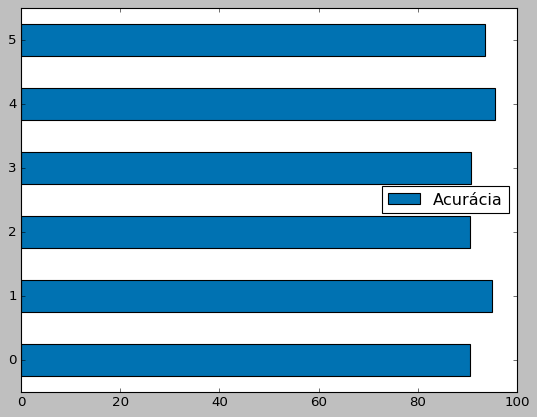

In [112]:
import matplotlib.pyplot as plt

dfacuracias.plot.barh( )